Output()

loss is: 0.0003447234630584717
54.053959131240845


Output()

loss is: 0.0026672445237636566
64.19994306564331


Output()

loss is: 0.002790197730064392
61.22114396095276


Output()

Graciously interrupting the training...
loss is: 0.4522392749786377
6.353630065917969


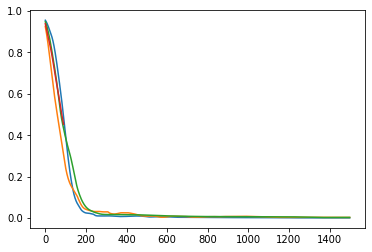

In [6]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit
import time

state_in = np.zeros(100, dtype=np.complex128)
state_in[0] = 1
target_out = np.zeros(100, dtype=np.complex128)
target_out[1] = 1

def loss(target, output):
    return  1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target)))**2
#     return  1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target_out)))

# for num_seed in [660,661,662,663,664,665]:
for num_seed in [11,23,36,445]:
    device = Circuit(num_layers=8, num_modes=1, num_seed = num_seed, dtype=tf.complex128)
    tuple_in_out = (state_in,target_out),
    device.set_input_output_pairs(*tuple_in_out)
    start = time.time()
    device.optimize(loss, steps=1500, scheduler=False)
    end = time.time()
    print(end - start)

In [2]:
# import matplotlib.pyplot as plt
# x = np.arange(100)
# final_state = device.show_final_state(state_in)
# plt.bar(x,tf.abs(final_state))

Output()

loss is: 0.0031249597668647766
770.9297680854797


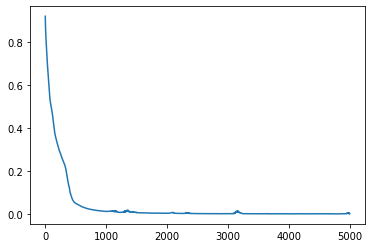

In [7]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit

state_in = np.zeros((10,10), dtype=np.complex128)
state_in[0,0] = 1
target_out = np.zeros((10,10), dtype=np.complex128)
target_out[5,0] = 1/np.sqrt(2)
target_out[0,5] = 1/np.sqrt(2)

def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target)))

device = Circuit(num_layers=20, num_modes=2, num_seed = 30, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=5000)
end = time.time()
print(end - start)

In [8]:
device.show_final_state(state_in)

state_in.shape (10, 10)
self._inout_pairs[0].shape[1] 10


array([[ 4.34417489e-03-2.97821168e-03j,  4.45670833e-03+1.75261930e-03j,
        -9.43449848e-03+1.42438977e-03j,  7.85176503e-03-1.32122622e-03j,
         2.77666084e-03-7.55090338e-03j, -4.24423425e-01-5.63466700e-01j,
         2.86302591e-02-7.99605362e-03j,  3.19242422e-03+1.62990241e-03j,
        -7.33312940e-04-1.35035898e-03j,  4.36200342e-03+2.63833025e-03j],
       [ 6.60335537e-03-1.03084973e-03j, -1.57637920e-02+2.23680181e-03j,
         6.91198459e-03+7.22886788e-03j,  1.00529128e-02+3.16345831e-03j,
        -6.33065096e-03+2.79157552e-03j, -6.14658194e-03-2.21544514e-03j,
        -5.81528486e-06+8.21062149e-03j, -4.94196887e-03+1.07917058e-02j,
        -1.19890933e-03-2.02587002e-04j, -1.16212971e-03-1.31558790e-03j],
       [-4.60021393e-03-1.19243283e-02j, -2.58393718e-03+1.34410404e-02j,
        -4.63598686e-03+9.49692818e-03j, -5.38714257e-03-5.55217465e-03j,
         2.41763951e-03-1.20360206e-03j, -3.30866706e-03+8.65364379e-03j,
        -1.93862518e-03-2.07797143e-

In [9]:
from scipy.special import factorial as fac
def hex_GKP(mu, d, delta, cutoff, nmax=7):
    r"""Hexagonal GKP code state.
    The Hex GKP state is defined by
    .. math::
        |mu> = \sum_{n_1,n_2=-\infty}^\infty e^{-i(q+\sqrt{3}p)/2}
            \sqrt{4\pi/\sqrt{3}d}(dn_1+\mu) e^{iq\sqrt{4\pi/\sqrt{3}d}n_2}|0>
    where d is the dimension of a code space, \mu=0,1,...,d-1, |0> is the
    vacuum state, and the states are modulated by a Gaussian envelope in the
    case of finite energy:
    ..math:: e^{-\Delta ^2 n}|\mu>
    Args:
        d (int): the dimension of the code space.
        mu (int): mu=0,1,...,d-1.
        delta (float): width of the modulating Gaussian envelope.
        cutoff (int): the Fock basis truncation of the returned state vector.
        nmax (int): the Hex GKP state |mu> is calculated by performing the
            sum using n1,n1=-nmax,...,nmax.
    Returns:
        array: a size [cutoff] complex array state vector.
    """
    n1 = np.arange(-nmax, nmax+1)[:, None]
    n2 = np.arange(-nmax, nmax+1)[None, :]

    n1sq = n1**2
    n2sq = n2**2

    sqrt3 = np.sqrt(3)

    arg1 = -1j*np.pi*n2*(d*n1+mu)/d
    arg2 = -np.pi*(d**2*n1sq+n2sq-d*n1*(n2-2*mu)-n2*mu+mu**2)/(sqrt3*d)
    arg2 *= 1-np.exp(-2*delta**2)

    amplitude = (np.exp(arg1)*np.exp(arg2)).flatten()[:, None]

    alpha = np.sqrt(np.pi/(2*sqrt3*d)) * (sqrt3*(d*n1+mu) - 1j*(d*n1-2*n2+mu))
    alpha *= np.exp(-delta**2)

    alpha = alpha.flatten()[:, None]
    n = np.arange(cutoff)[None, :]
    coherent = np.exp(-0.5*np.abs(alpha)**2)*alpha**n/np.sqrt(fac(n))

    hex_state = np.sum(amplitude*coherent, axis=0)
    return hex_state/np.linalg.norm(hex_state)

In [ ]:
import numpy as np
import tensorflow as tf
from poenta.circuit import Circuit
import time

state_in = np.zeros(100, dtype=np.complex128)
state_in[0] = 1
target_out = hex_GKP(1, 2, 0.3, 100, nmax=7)


def loss(target, output):
    return 1 - tf.abs(tf.reduce_sum(output * tf.math.conj(target))) ** 2

device = Circuit(num_layers=25, num_modes=1, num_seed = 52, dtype=tf.complex128)
tuple_in_out = (state_in,target_out),
device.set_input_output_pairs(*tuple_in_out)
start = time.time()
device.optimize(loss, steps=10000)
end = time.time()
print(end - start)

Output()

state_in.shape (50,)
self._inout_pairs[0].shape[1] 50


/Users/mac/anaconda3/envs/thewalrusenv/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


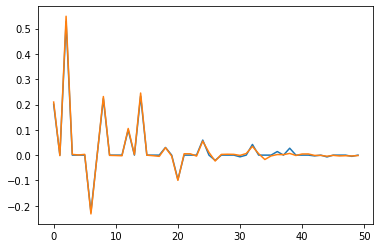

In [14]:
import matplotlib.pyplot as plt
plt.plot(hex_GKP(1, 2, 0.3, 50, nmax=7))
plt.plot(device.show_final_state(state_in))